## Momentum 

In the first IBM Q exercises we have learned that when we meausure the position, $x$, of a particle with the wave function $\Psi$, we do not always get the same answer. But what happens if we measure the momentum $p$, does the measured momenta fluctuate?

Let's set up an experiment and see!

**What:** We will set up two different wave functions and measure the momentum for each. 

**Learning objective:** get acquainted with measurement of momentum in a quantum system. 

As alwys let's first import the libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

.. and the code to define the wave function

In [2]:
#initialising a quantum circuit. 
def initial(N,M):
    q = QuantumRegister(N) #N is th number of qubits
    c = ClassicalRegister(M) #M is the number of bits
    qc = QuantumCircuit(q,c)
    return qc


#make desired vector: 
def state(liste,qc): 
    C = np.array(liste) #len(C) is the number of states. 

    N = len(C)
    H_d = 2**N
    
    fullstate = np.zeros(H_d)
    for k in range(N):
        fullstate[(1 << k) ]+=C[k]
        
    norm = np.linalg.norm(fullstate)
    fullstate = fullstate/norm
    return qc.initialize(fullstate.tolist(), qc.qubits)


**Our wave functions:**

For simplicity we will work with just 3 positions: $x_1=0$, $x_2=a$, and $x_3=2a$. 

To understand better the measurement of momentum we will consider two differnet wave functions. The first, $\Psi_1$, has a well defined location 

\begin{eqnarray}
\Psi_1(x_0,t=0) & = & 0 \\ 
\Psi_1(x_1,t=0) & = & 0 \\ 
\Psi_1(x_2,t=0) & = & 1
\end{eqnarray}

The second wave function, $\Psi_2$, is spread out uniformly across the 3 sites.

\begin{eqnarray}
\Psi_2(x_0,t=0) & = & \frac{1}{\sqrt{3}} \\ 
\Psi_2(x_1,t=0) & = & \frac{1}{\sqrt{3}} \\ 
\Psi_2(x_2,t=0) & = & \frac{1}{\sqrt{3}}
\end{eqnarray}

**Exersice 1:** Check that $\Psi_1$ and $\Psi_2$ are normalized.  

**Exercise 2:** Recap: If the particle has the wave function $\Psi_1$ and you measure the position what would the result be? If the particle has the wave function $\Psi_2$ and you measure the position what is the probability that we get $x_j$ for $j=0,1,2$? 

**Measurement of momentum:**

Just as position is an observable we can measure of a particle in state $\psi$, so is the momentum $p$! Before we can do so, however, we need to tramsform our position measuring gauges in to a momentum measuring gauges. 

(We will see in chapter 3 of Griffiths and Schröeter that this is done by a Fourier-transformation.) 

Let's first define the transformation from $x$ to $p$:

In [3]:
def x_to_p(N):#N is the number of qubits in our psi state. 
    
    H_d = 2**N

    U = np.diag(np.ones(H_d)).tolist()

    x = np.arange(N)
    p = np.arange(N)

    for i in range(N):
        index_i = 1 << i #1 bitshifted by i - picks up our pure states
        for j in range(N):
            index_j = 1 << j
            arg = 2 * p[j] * (x[i]-1) * np.pi/N
            U[index_i][index_j] = 1/np.sqrt(N) * np.exp(arg*1j)
    return U

... and then set up the experiment (we start with $\Psi_1$)

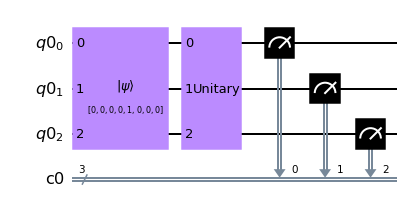

In [4]:
N=3
qc0 = initial(N,N)

state([0,0,1],qc0)
qc0.unitary(x_to_p(3),qc0.qubits)
qc0.measure(0,0)
qc0.measure(1,1)
qc0.measure(2,2)

qc0.draw()

**How the read the diagram:**

The first purple box sets up our wave function $\Psi_1$. The second purple box transforms the position gauges to the right into momentum gauges, allowing us to measure the momentum.

(Why does the it say "Unitary"? Because the Fourier transform we imply is unitary.)

Now let's measure the momentum! 

As we have 3 possible positions, there are also 3 possible values of momentum we can measure: $p=-\hbar/2$, $p = 0, \hbar/a$ and $p=\hbar/2$. 

In [9]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(qc0, shots=1, memory=True).result()
memory = result.get_memory(qc0)
y = ()
for i in range(N):   
    element = "0"*(N-1-i)+"1"+"0"*i
    y = y + (element,) 
y = tuple(y)
z=np.array([0,0,0])
for x in memory:
    momentum = y.index(x)
    print("Measured momentum,", momentum-1,"hbar/a") 

Measured momentum, 0 hbar/a


**Exercise 3:** Try to run the experiment a few times and descrobe the result. 

**Exercise 4:** The wave function $\Psi_1$ locates the particle at the position $x_3$. What would you expect would change in the measurement of momentum if $\Psi_1$ instead located the particle at $x_2$? Check by changing the wave function in the code and run the experiment again. 

Now let's look $\Psi_2$, doing the same as we did with $\Psi_1$.

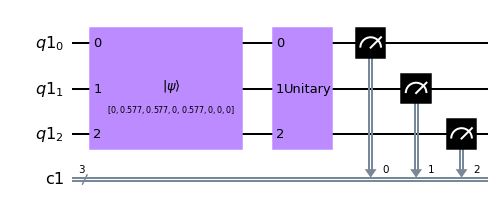

In [10]:
N=3
qc1 = initial(N,N)

state([1/np.sqrt(3) , 1/np.sqrt(3) , 1/np.sqrt(3)],qc1)
qc1.unitary(x_to_p(3),qc1.qubits)
qc1.measure(0,0)
qc1.measure(1,1)
qc1.measure(2,2)

qc1.draw()

In [14]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(qc1, shots=1, memory=True).result()
memory = result.get_memory(qc1)
y = ()
for i in range(N):   
    element = "0"*(N-1-i)+"1"+"0"*i
    y = y + (element,) 
y = tuple(y)
z=np.array([0,0,0])
for x in memory:
    momentum = y.index(x)
    print("Measured momentum,", momentum-1,"hbar/a") 

Measured momentum, 0 hbar/a


**Exercise 5:** Run the experiment a few times and describe the outcome.

**Exercise 6:** Use the results of our experiments with $\Psi_1$ and $\Psi_2$ to discuss the statement 'the more precisely the determined a particle's position is, the less precisely is its momentum.' (see Griffiths and Schröeter section 1.6).  

**Take home:** Just like we can measure position we can also measure momentum of a particle with a given wave function. If the wave function localizes the particles position, the measurement of momentum varies. On the contrary if the wave function is uniformely distributed over all positions, the measurement of momentum always gives zero. 